In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 手动梯度下降法

### 生成测试数据集

In [2]:
# 定义数据集合
X = np.arange(0,10,0.1, dtype=np.float32)
Y = 2*X + 2*np.random.random(100)

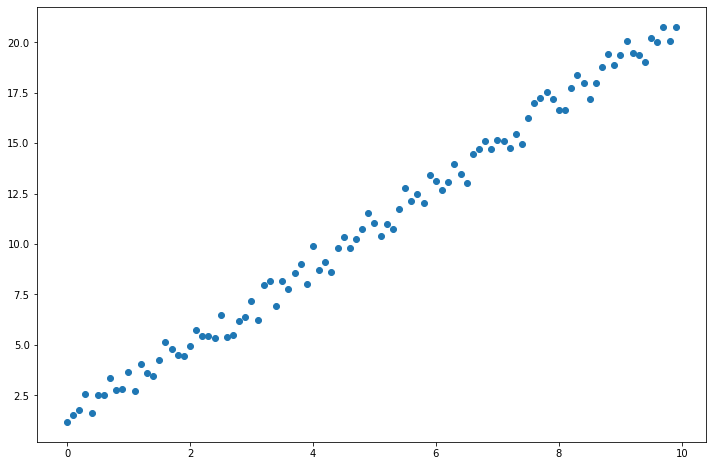

In [3]:
# 可视化数据集
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(X,Y)

fig.show()

### 反向传播

我们可以将损失函数值Loss定义如下：

$$Loss(w) = \frac{1}{N}\sum_{i=1}^N(w\cdot x_i - y_i)^2$$

接着我们求loss关于w的梯度.

$$ \frac{\partial{Loss}}{\partial w} = \frac{1}{N}\sum_{i=1}^N(2wx_{i}^2-2x_{i}y_{i}) $$

In [4]:
#返回dJ/dw
def gradient(x, y, w):
    """计算梯度
    """
    return np.mean(2*w*x*x-2*x*y)

### 梯度下降

接着我们就可以对参数w进行优化, 有以下的步骤:

1. 随机初始化一个 w 的值。
2. 在该 w 下进行正向传播，得到所有 x 的预测值 y_pre。
3. 通过实际的值 y 和预测值 y_pre 计算损失。
4. 通过损失计算梯度 dw。
5. 更新$ w：w = w-lr\cdot dw$，其中 $lr$ 为步长，可自定义具体的值。
6. 重复步骤 $2-5$，直到损失降到较小位置

In [8]:
# 我们先定义一些变量

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

w = 0.0 # 初始化系数

# 定义步长和迭代次数
learning_rate = 0.001
n_iters = 100

In [9]:
for epoch in range(n_iters):
    # 彰显传播
    y_pred = forward(X)
    #计算损失
    l = loss(Y, y_pred)
    #计算梯度
    dw = gradient(X, Y, w)
    #更新权重 w
    w = w - learning_rate * dw

    if epoch % 20 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'根据训练模型预测，当 x=7 时，y 的值为： {forward(7):.3f}')

epoch 1: w = 0.141, loss = 152.59258767
epoch 21: w = 1.635, loss = 10.60649751
epoch 41: w = 2.019, loss = 1.22531436
epoch 61: w = 2.118, loss = 0.60549024
epoch 81: w = 2.143, loss = 0.56453753
根据训练模型预测，当 x=7 时，y 的值为： 15.046


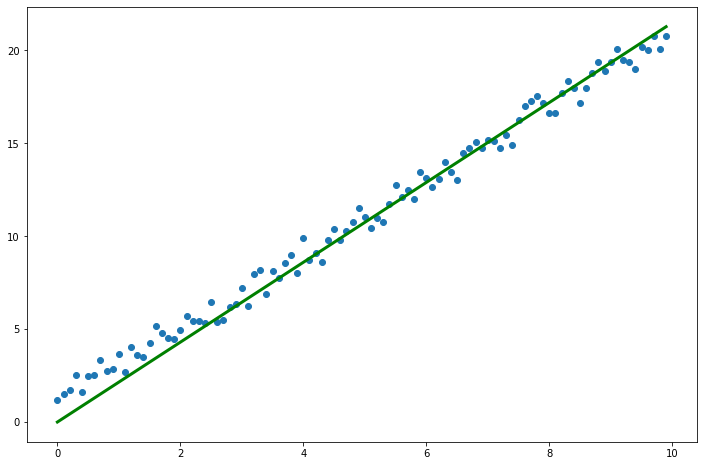

In [10]:
# 绘制预测曲线
y_pre = forward(X)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(X,Y)
ax.plot(X, y_pre, 'g-',  lw=3)

fig.show()

## 使用Pytorch进行梯度下降

使用Pytorch来求解上面的问题.

In [40]:
X = np.arange(0,10,0.1, dtype=np.float32)
Y = 2*X + 2*np.random.random(100)

X_tensor = torch.from_numpy(X)
Y_tensor = torch.from_numpy(Y)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

learning_rate = 0.001
n_iters = 100

In [41]:
for epoch in range(n_iters):
    y_pred = forward(X_tensor)
    l = loss(Y_tensor, y_pred) # 求误差
    l.backward() # 求梯度
    with torch.no_grad():
        w.data = w.data - learning_rate * w.grad
    
    # 清空梯度
    w.grad.zero_()

    if epoch % 20 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'根据训练模型预测, 当x=5时, y的值为： {forward(5):.3f}')

epoch 1: w = 0.140, loss = 149.477
epoch 21: w = 1.618, loss = 10.344
epoch 41: w = 1.999, loss = 1.151
epoch 61: w = 2.096, loss = 0.544
epoch 81: w = 2.121, loss = 0.504
根据训练模型预测, 当x=5时, y的值为： 10.638


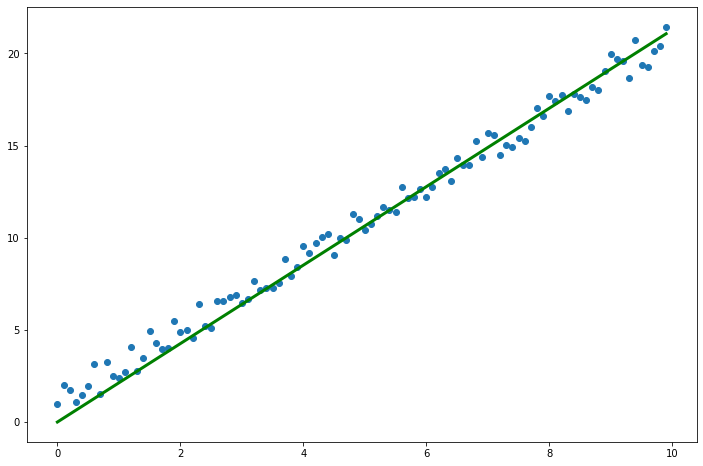

In [46]:
# 绘制预测曲线
y_pre = forward(X_tensor).detach().numpy()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(X,Y)
ax.plot(X, y_pre, 'g-',  lw=3)

fig.show()